FIAP - Machine Learning & Modelling

# Aula 05 - Árvores de decisão 

Vamos começar a desenvolver modelos de Machine Learning em Python, utilizando a biblioteca [_scikit-learn_](https://scikit-learn.org/stable/index.html). Nesta aula utillizaremos a famosa base de dados do Titanic, disponível no [Kaggle](https://www.kaggle.com/c/titanic). Nosso objetivo é desenvolver um modelo para predizer sobreviventes do naufrágio. 

Construiremos diversos modelos preditivos ao longo das aulas, aprendendo na prática as semelhanças e diferenças entre eles. 


**Objetivos de aprendizagem**:

- Recapitular o ciclo de desenvolvimento de Data Science, desde a elaboração da hipótese até a apresentação do resultado
- Exercitar o ciclo na prática, com o desenvolvimento de um modelo preditivo 
- Conhecer as nuances práticas do modelo supervisionado de classificação baseado em árvore de decisão 
- Se familiarizar com uma das principais bibliotecas de Python para Machine Learning

In [ ]:
!pip install matplotlib

In [ ]:
!pip install sklearn

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Metodo para separação de TREINO e TESTE
from sklearn.model_selection import train_test_split

# Algoritimos de Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Visualização da árvore
from sklearn.tree import plot_tree

# Metrica de avaliação
from sklearn.metrics import accuracy_score

%matplotlib inline

### Leitura da base de TREINO

In [5]:
df = pd.read_csv("titanic.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df["Pclass"]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Limpeza da base de TREINO 
- Usar apenas as features de interesse : *Survived, Age, Pclass, Sex*
- Remover linhas sem informação (NA)
- Transformar strings em dados numéricos

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(183, 12)

Expressão lambda para definir como a coluna SEX deve ter os valores alterados

Esta expressão tem o mesmo comportamento da seguinte função: 

```python
def sexo(x):
    if x == "male":
        return 0
    else:
        return 1
```

In [13]:
df["Sex"].unique()

array(['female', 'male'], dtype=object)

In [14]:
def sexo(x):
    if x == "male":
        return 0
    else:
        return 1

In [15]:
df["Sex"] = df["Sex"].apply(sexo)

In [16]:
df = df [ ["Survived","Age","Pclass","Sex"] ]

### Machine learning (criação dos modelos)
Principais passos: 
- dividir os dados entre treino e teste
- escolher qual modelo (algoritmo) utilizar
- criar o modelo em si (treino)
- avaliar o "poder preditivo" do método 

In [17]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

Aqui fazemos a separação entre TREINO e TESTE, efetivamente. Estamos pedindo uma divisão entre 25% dos dados para o TESTE e os outros 75% para o TREINO. Aqui existe uma separação aleatória entre os dados, cuja semente do gerador aleatório é o número 42. Os dados estão no datatrame **X** e os labels no dataframe **y**. 

Os resultados serão: 
- X_train = os dados do TREINO
- X_test = os dados do TESTE
- y_train = os labels do TREINO
- y_test = os labels do TESTE

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=22)

In [20]:
X

,Age,Pclass,Sex
1,38.0,1,1
3,35.0,1,1
6,54.0,1,0
10,4.0,3,1
11,58.0,1,1
...,...,...,...
871,47.0,1,1
872,33.0,1,0
879,56.0,1,1
887,19.0,1,1


In [21]:
X_test

,Age,Pclass,Sex
765,51.0,1,1
21,34.0,2,0
412,33.0,1,1
632,32.0,1,0
796,49.0,1,1
645,48.0,1,0
741,36.0,1,0
587,60.0,1,0
209,40.0,1,0
701,35.0,1,0


Agora começamos a criar os modelos preditivos. É uma boa prática padronizarmos os dados, mas aqui estamos com uma base bem comportada, então não vamos nos preocupar com isso, podendo ir direto para as modelagens. 

Para construir um **classificador baseado em árvore de decisão**, chamamos o construtor da classe "DecisionTreeClassifier()", realizamos o treinamento do modelo com os dados e labels do TREINO e na sequência obtemos os valores **preditos** do TESTE com o método "predict()"

In [35]:
# Arvore 
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred_label = tree.predict(X_test)

In [24]:
# Quais são as classes? 
tree.classes_

array([0, 1], dtype=int64)

In [25]:
# Quais são os labels preditos? 
y_pred_label

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1], dtype=int64)

In [36]:
# Qual a taxa de acerto? 
accuracy_score(y_test,y_pred_label)

0.8260869565217391

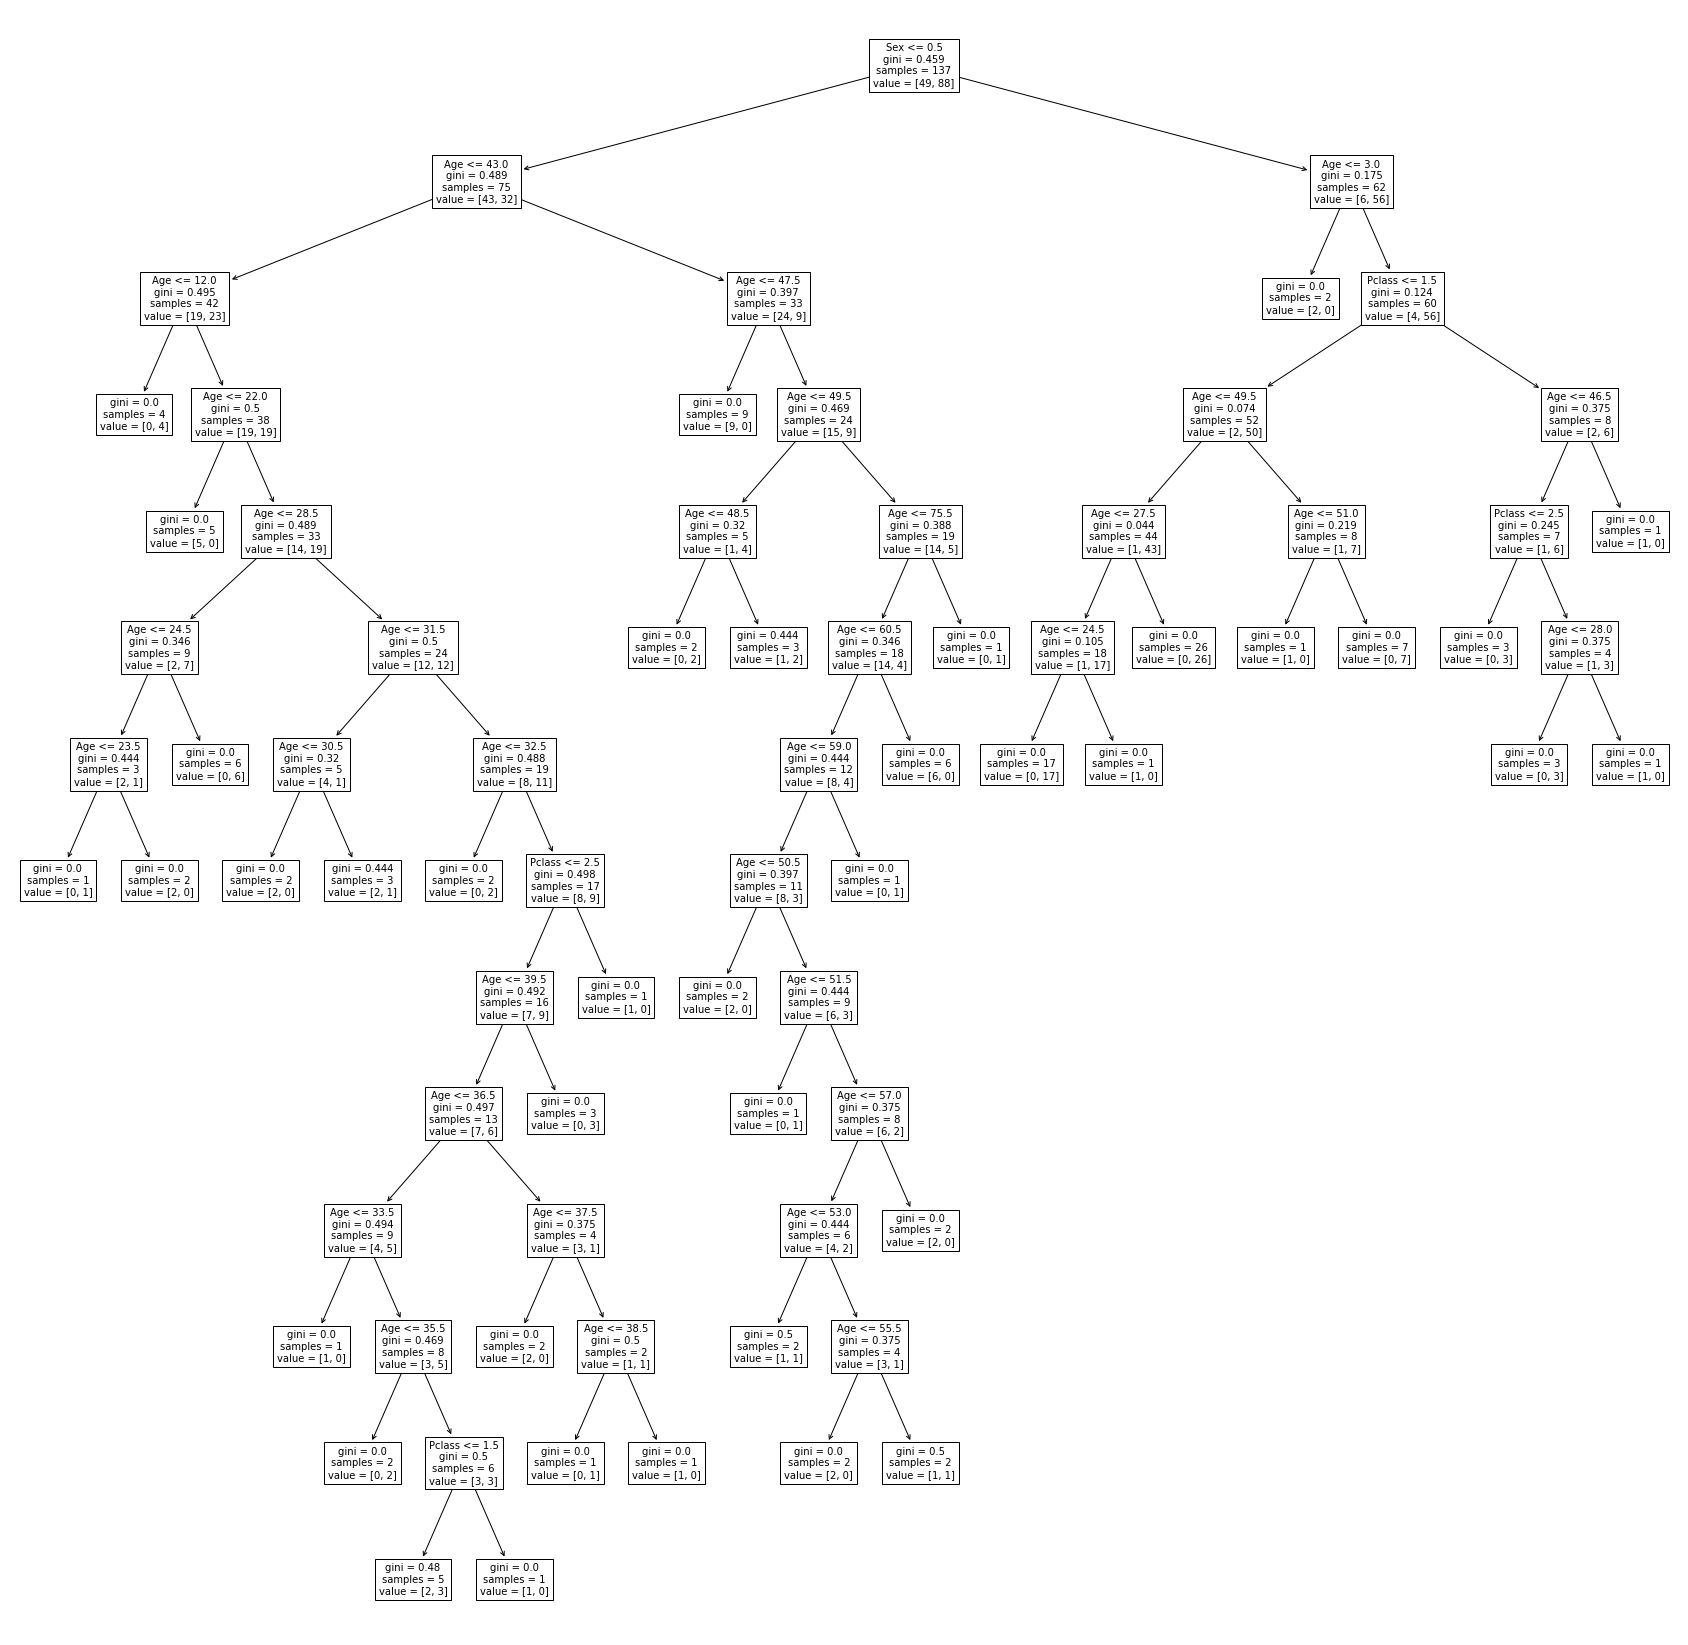

In [32]:
# Podemos visualizar a árvore criada? 
plt.figure(figsize=(30,30))
plot_tree(tree, fontsize=10,feature_names = X_train.columns)
plt.show()

Agora vamos testar o comportamento dos mesmos dados num modelo de **Florestas Aleatórias**:

In [135]:
floresta = RandomForestClassifier(n_estimators=5)
floresta.fit(X_train, y_train)
y_pred_label_floresta = floresta.predict(X_test)

In [136]:
accuracy_score(y_test, y_pred_label_floresta)

0.7608695652173914

## Trabalhando com a AUC

A AUC é a área abaixo da curva ROC. Nós vamos verificar o que esta métrica significa adiante e como ela se compara com outras métricas, como a ACC (acurácia). 

Aqui o importante é saber que para cálculo da AUC nós precisamos das _probabilidades_ de cada exemplo do teste pertencer a alguma das classes! Para obter essas probabilidades, vamos usar o método `predict_proba()`. 

**Em resumo**: 
- **ACC** (acurária): mede a quantidade de acertos do método. Depende dos labels reais e dos _labels preditos_, obtidos com `predict()`; 
- **AUC** (área abaixo da curva ROC): mede o aprendizado global do método, ou seja, o quanto ele performa melhor que uma escolha aleatória. Depende dos labels reais e das _probabilidades_ de cada exemplo pertercer a cada uma das classes, obtidas com `predict_proba()`; 

In [137]:
# ARVORE
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_prob = tree.predict_proba(X_test)

In [138]:
y_pred_prob

array([[0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ]])

In [139]:
from sklearn.metrics import roc_auc_score

In [140]:
roc_auc_score(y_test,y_pred_prob[:,1])

0.7212301587301587

### Iterando por múltiplos modelos

Vamos construir outros modelos e testá-los de uma vez, armazenando os resultados para encontrarmos o mais promissor. 

In [10]:
# "modelos" é uma lista de tuplas, sendo que cada tupla contém o construtor de um 
# modelo de classificação, e seu nome como string


Aqui estamos iterando por cada modelo da lista `modelos`. Para cada tupla, desenformamos pegando o primeiro elemento e armazenando na variável `classificador`, e o segundo elemento na variável `nome`. 

Para cada classificador, nós treinammos ( com o _fit()_ ) e obtemos as predições dos labels ( com _predict()_ ). Daí calculamos a ACC (acurácia) e imprimimos a resposta. 

## Construindo o modelo final

Agora que sabemos qual é o melhor modelo que avaliamos, vamos usar TODO o dataset original para criar o modelo final baseado na melhor opção e em todos os dados existentes. 

Este modelo será utilizado para fazer predições de **novos dados**! Preencham: https://forms.gle/p4Z8JWRiYoUanFKw7 

<font color="red"> **IMPORTANTE:** </font> devido às variações aleatórias nas inicializações dos métodos, talvez quando vc executar o código acima novamente outro modelo pode ter o melhor resultado!

Vamos pegar as respostas que vocês deram para prever quem sobreviveria ao desastre do Titanic. Para isso, devemos: 

- Ler os dados
- Fazer os mesmos procedimentos de limpeza que anteriormente
- Selecionar as MESMAS VARIÁVEIS QUE ALIMENTARAM O MODELO, E NA MESMA ORDEM para serem as variáveis que basearão a resposta do modelo

In [11]:
# Limpando os dados no mesmo formato que antes: Homem -> 0 ; Mulher -> 1


In [12]:
# Eliminando algumas variáveis inúteis


Aqui vamos pegar as predições do modelo, usando apenas os dados que importam, na ordem adequada.

In [13]:
# Coluna de saída do modelo


In [14]:
# Coluna de interpretação do modelo. NOTA: o problema original é verificar os "sobreviventes", 
# logo a classe 1 indica que sobreviveu, e a classe 0 que NÃO sobreviveu
